# PPA tables with `plottable`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from plottable import Table, ColumnDefinition
from plottable.formatters import decimal_to_percent
from plottable.plots import bar


In [3]:
%matplotlib auto

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [4]:
plt.ioff() 
plt.rcParams['svg.fonttype'] = 'none'


In [5]:
PATH = Path(r"G:\Drive partagés\CL_Chanel APAC\2024 PPA\4.Excels")
assert PATH.exists()

tabs = {
    'recruitment': "SAS 12.1 RECRUT REACH SSCAT",
    'conversion': "SAS 12.1b Focus converties",
    'generation': "SAS 12.2 RECRUT REACH SSCAT GYZ",
    "labels_mappings": "Params"
}

APAC_file = PATH / "2024 - Chanel PPA Asia - Global APAC - V0.5.xlsx"
CHN_file = PATH / "Par marché" / "2024 - Chanel PPA Asia - China - V0.2.xlsx"


In [6]:

def load_data_from_files(region, market, tabs) -> dict:
    region_data = _read_data(path=region, tab=tabs["recruitment"], skiprows=1)
    market_data = _read_data(path=market, tab=tabs["recruitment"], skiprows=1)

    label_mapping = (
        _read_data(
            path=market,
            tab=tabs["labels_mappings"],
            skiprows=1,
            usecols=[6, 7],
            header=None,
            names=["micro_categorie", "chart"],
        )
        .dropna()
        .drop_duplicates(subset="micro_categorie", keep="first")
        .set_index("micro_categorie")
        .squeeze()
    )

    return {
        "region": region_data,
        "market": market_data,
        "label_mapping": label_mapping,
    }


def _read_data(path, tab, **kwargs) -> pd.DataFrame:
    return (
        pd.read_excel(path, sheet_name=tab, **kwargs).replace(",", pd.NA)
        # .pipe(col_types_on_substr, col_types=SUBSTR_TYPES)
    )



In [7]:
from collections.abc import Callable, Sequence
from numbers import Number


def pick_colour(val: float):
    if val < -0.05:
        return 'darkred'
    elif val > 0.05:
        return 'darkgreen'
    else:
        return 'dimgray'

def apply_colour(val, colour_fn: Callable[[float], str], strfmt: str = "+.0%"):
    if isinstance(val, Number):
        return f'<{val:{strfmt}}::{{"color": "{colour_fn(val)}"}}>\n'

    return val

def combine_cols_to_multiline(table, cols: Sequence, mapfn:Callable):
    return table[cols].map(mapfn).sum(axis=1)
    # return table[cols].map(lambda v: apply_colour(v, pick_colour)).sum(axis=1)


display(apply_colour(-0.002, pick_colour))

'<-0%::{"color": "dimgray"}>\n'

In [8]:
data = load_data_from_files(region=APAC_file, market=CHN_file, tabs=tabs)


In [9]:
data['market'].columns.to_list()

['macro_categorie',
 'nom_micro_categorie',
 'micro_categorie',
 'ca_prem_ach_xsell_ty',
 'ca_prem_ach_xsell_ly',
 'evol_ca_prem_ach_xsell',
 'ca_prem_ach_only_ty',
 'ca_prem_ach_only_ly',
 'evol_ca_prem_ach_only',
 'ca_prem_ach_ty',
 'ca_prem_ach_ly',
 'evol_ca_prem_ach',
 'share_of_entry_ty',
 'share_of_entry_ly',
 'evol_share_of_entry',
 'repeat_rate_ty',
 'repeat_rate_ly',
 'evol_repeat_rate',
 'repeat_to_ty',
 'repeat_to_ly',
 'evol_repeat_to',
 'nb_cli_ty',
 'nb_cli_2yago_ty',
 'nb_cli_repeat_ty',
 'pene_ty',
 'pene_ly',
 'evol_pene',
 'recr_index_ty',
 'recr_index_ly',
 'evol_recr_index',
 'future_value_ty',
 'future_value_ly',
 'evol_future_value',
 'nb_tickets_ty',
 'nb_tickets_ly',
 'evol_nb_tickets',
 'nb_cli_ly']

In [11]:
first_purch_to_cols      = [     'ca_prem_ach_only_ty',   'ca_prem_ach_xsell_ty',   'ca_prem_ach_ty']
first_purch_to_cols_evol = ['evol_ca_prem_ach_only', 'evol_ca_prem_ach_xsell', 'evol_ca_prem_ach']

# data['market'][first_purch_to_cols].map(lambda v: apply_colour(v, pick_colour)).sum(axis=1)


display(combine_cols_to_multiline(data['market'], cols=first_purch_to_cols, mapfn='<${:,.1f}k::{{}}>\n'.format).head(5).to_list(),
combine_cols_to_multiline(data['market'], cols=first_purch_to_cols_evol, mapfn=lambda v: apply_colour(v, pick_colour)).head(5).to_list())

['<$7,272.0k::{}>\n<$9,618.1k::{}>\n<$7,493.8k::{}>\n',
 '<$3,364.6k::{}>\n<$7,019.4k::{}>\n<$3,782.9k::{}>\n',
 '<$842.5k::{}>\n<$6,063.3k::{}>\n<$2,095.3k::{}>\n',
 '<$1,539.8k::{}>\n<$6,703.1k::{}>\n<$2,716.0k::{}>\n',
 '<$7,254.8k::{}>\n<$14,311.3k::{}>\n<$10,452.7k::{}>\n']

['<+14%::{"color": "darkgreen"}>\n<+18%::{"color": "darkgreen"}>\n<+15%::{"color": "darkgreen"}>\n',
 '<+17%::{"color": "darkgreen"}>\n<+7%::{"color": "darkgreen"}>\n<+12%::{"color": "darkgreen"}>\n',
 '<+11%::{"color": "darkgreen"}>\n<+9%::{"color": "darkgreen"}>\n<-1%::{"color": "dimgray"}>\n',
 '<+17%::{"color": "darkgreen"}>\n<+12%::{"color": "darkgreen"}>\n<+8%::{"color": "darkgreen"}>\n',
 '<+6%::{"color": "darkgreen"}>\n<+20%::{"color": "darkgreen"}>\n<+16%::{"color": "darkgreen"}>\n']

In [11]:
data['market'] = data['market'].assign(
    first_purch_to=combine_cols_to_multiline(data['market'], cols=first_purch_to_cols, mapfn=lambda v: '${:,.1f}k\n'.format(v/1000)),
    evol_first_purch_to=combine_cols_to_multiline(data['market'], cols=first_purch_to_cols_evol, mapfn=lambda v: apply_colour(v, pick_colour)),
)

In [12]:
def kdollar(x):
    return f"${x/1000:,.1f}k"

def percentage_points(x):
    return f"{x*100:+.0f}ₚₚ"

def pct(x):
    return f"{x:+.0%}"

In [13]:
CHN_HB_2023 = (
    data['market']
    .query("macro_categorie == 'A_HANDBAG' & nom_micro_categorie == 'sous_cat_hb'")
    .loc[:, [
        'micro_categorie',
        'first_purch_to', 'evol_first_purch_to',
        'share_of_entry_ty', 'evol_share_of_entry',
        'recr_index_ty',  'evol_recr_index',
        'repeat_rate_ty', 'evol_repeat_rate',
        'repeat_to_ty',  'evol_repeat_to',
    ]]
    .set_index('micro_categorie')
)

In [14]:
col_defs = [
    ColumnDefinition(name="micro_categorie",  title=' ', width=1.25), 
    ColumnDefinition(name="first_purch_to", title='evol.', group="Entry T.O.", width=0.75, ),
    ColumnDefinition(name="evol_first_purch_to", title='evol.', group="Entry T.O.", width=0.75,),
    ColumnDefinition("share_of_entry_ty",
        group="Share of entry",
        title='',
        width=1.25,
        plot_fn=bar,
        plot_kw={
            "annotate": True,
            "height": 0.95,
            "lw": 0.,
            'xlim': (0, 1),
            "formatter": decimal_to_percent,
            "color": "#d2b496",
        },
    ),
    ColumnDefinition(name="SOE_evol", title='vs LY.', group="Share of entry", width=0.75, formatter=percentage_points, textprops={'family': 'sans-serif'}),
    ColumnDefinition(
        "Repeat_Rate", 
        title=' ',
        group="Repeat Rate", 
        width=1.25,
        plot_fn=bar,
        plot_kw={
            "annotate": True,
            "height": 0.95,
            "lw": 0.,
            'xlim': (0,1),
            "formatter": decimal_to_percent,
            "color": "#d2b496",
        },
    ),
    ColumnDefinition(name="Repeat_Rate_evol", title='vs LY.', group="Repeat Rate", formatter=percentage_points, textprops={'family': 'sans-serif'}, width=0.75),
    ColumnDefinition(name="Repeat_TO_value", title=' ', group="Repeat TO",  formatter=kdollar),
    ColumnDefinition(name="Repeat_TO_evol", title='vs LY.', group="Repeat TO", formatter=pct, width=0.75),

]

In [15]:
fig, ax = plt.subplots(figsize=(15, 7.5))
plt.rcParams['font.family'] = 'Century Gothic'
# plt.grid(linestyle='--')


In [16]:

tab = Table(
    CHN_HB_2023,
    # column_definitions=col_defs,
  
)


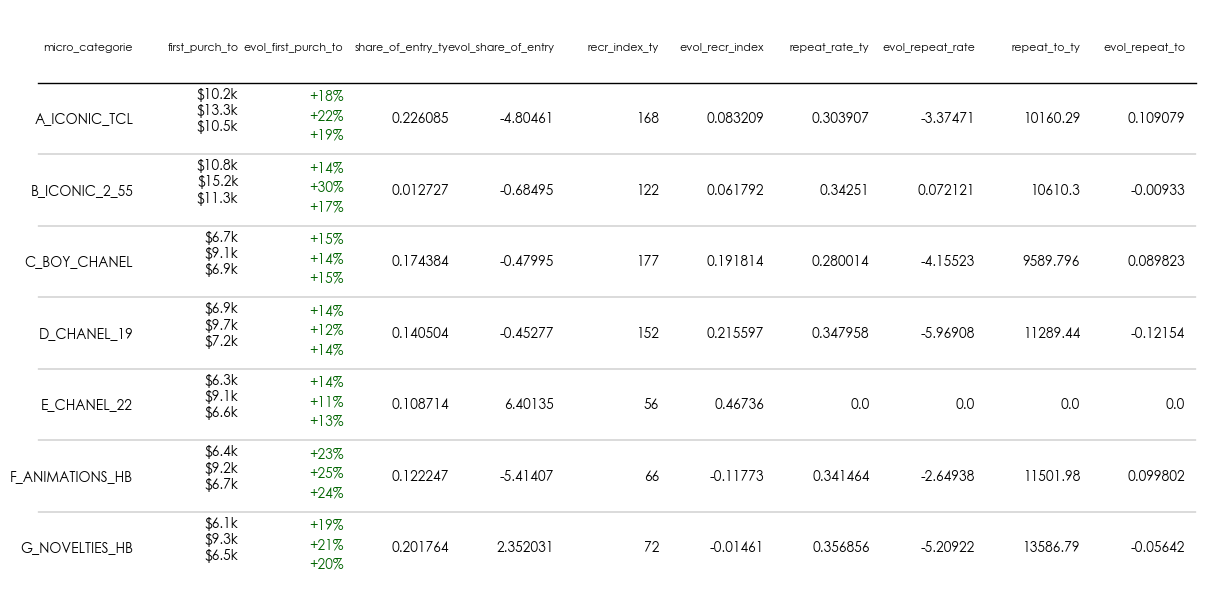

In [17]:

# for cell in tab.col_label_row.cells:
#     cell.rectangle_patch.set_height(0.25)

tab.col_label_row.set_fontfamily('Century Gothic')
tab.col_label_row.set_fontsize(8)
# tab.col_label_row.set_facecolor("#f0f")

for i, row in enumerate(tab.rows):
    # tab.rows[row].set_edgecolor("#f00")
    # tab.rows[row].set_facecolor("#ff0")
    tab.rows[row].set_linewidth(0.75)

# print(ax.get_ylim(), tab.col_label_row.index)


# plt.savefig('test.svg', bbox_inches='tight', pad_inches=0.01)
plt.show()